1. INSTALL AND IMPORT DEPENDENCIES

In [103]:
#!pip install easyocr
#!pip install imutils

In [104]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr
 

2. READING IMAGE THEN GRAYSCALING AND BLURRING !

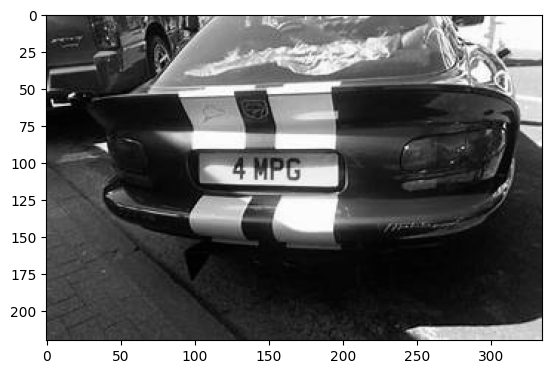

In [105]:
img = cv2.imread('../License Plate Detection/Image-Audio file/s2.jpeg')
gr3y = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gr3y,cv2.COLOR_BGR2RGBA))

3. APPLYING FILTERS AND FINDING EDGES 

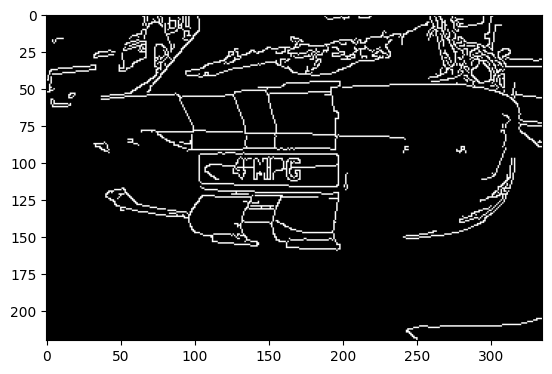

In [106]:
bfilter=cv2.bilateralFilter(gr3y,11,18,18) # Noise Reduction here !
edged=cv2.Canny(bfilter,35,600) #Edge Detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGBA))

In [107]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours  = imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea, reverse=True) [:10]

In [108]:
location = None
for contour in contours :
    approx = cv2.approxPolyDP(contour, 15 , True)
    if len(approx) == 4 :
        location = approx
        break

In [109]:
location

array([[[103,  95]],

       [[105, 114]],

       [[197, 115]],

       [[196,  94]]], dtype=int32)

In [110]:
mask = np.zeros(gr3y.shape, np.uint8)
img_new = cv2.drawContours(mask,[location],0,255,-1)
img_new = cv2.bitwise_and(img,img,mask=mask)


4. MASKING IMAGE AFTER APPLYING CONTOURS !

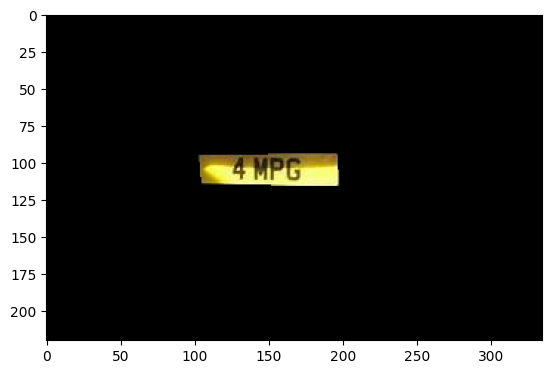

In [111]:
plt.imshow(cv2.cvtColor(img_new,cv2.COLOR_BGR2RGB))

In [112]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
crop_img = gr3y[x1:x2+1 , y1:y2+1]

5. GETTING CROPPED AND ELABORATED IMAGE 

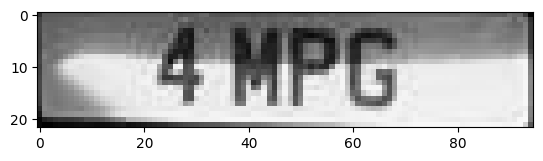

In [113]:
plt.imshow(cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB))

In [114]:
# Using Easy OCR to Read text in License plate 

reader = easyocr.Reader(['en'])
result = reader.readtext(crop_img)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


6. READING TEXT FROM IMAGE USING EASYOCR

In [136]:
print(result)

[([[21, 1], [73, 1], [73, 21], [21, 21]], '4 HpG', 0.2711044607923688)]


7. FINAL RESULT AFTER RENDERING

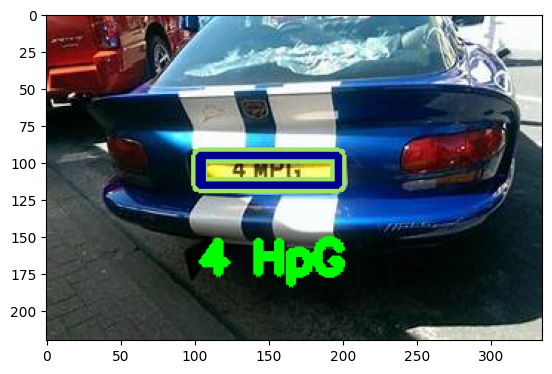

In [168]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
Resf = cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font, fontScale=1, color=(0,255,0),thickness=4,lineType=cv2.LINE_AA)
Resf = cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[1][0]),(139,0,0),3)
plt.imshow(cv2.cvtColor(Resf,cv2.COLOR_BGR2RGBA))